0. Imports and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # in order to always display every column

In [2]:
df = pd.read_csv("data/Specjalnosci_lozka.csv")

1. Data understanding

- Dataframe `shape`
- `head` and `tail`
- `columns`
- `dtypes`
- `describe`

In [3]:
df.shape

(51153, 11)

In [4]:
df.head

<bound method NDFrame.head of         Rok         Województwo         Powiat         Gmina  \
0      2017        dolnośląskie  bolesławiecki  Nowogrodziec   
1      2017        dolnośląskie  bolesławiecki   Bolesławiec   
2      2017        dolnośląskie  bolesławiecki   Bolesławiec   
3      2017        dolnośląskie  bolesławiecki   Bolesławiec   
4      2017        dolnośląskie  bolesławiecki   Bolesławiec   
...     ...                 ...            ...           ...   
51148  2023            opolskie       m. Opole         Opole   
51149  2023             śląskie    m. Katowice      Katowice   
51150  2023       wielkopolskie      m. Poznań        Poznań   
51151  2023       wielkopolskie      m. Poznań        Poznań   
51152  2023  zachodniopomorskie    m. Szczecin      Szczecin   

           Poziom sieci PSZ  \
0               Poza siecią   
1         Szpital I stopnia   
2         Szpital I stopnia   
3         Szpital I stopnia   
4         Szpital I stopnia   
...            

In [8]:
df.columns

Index(['Rok', 'Województwo', 'Powiat', 'Gmina', 'Poziom sieci PSZ',
       'Rodzaj Świadczeń', 'Nazwa Specjalności komórki',
       'Kod specjalności komórki', 'Liczba oddziałów', 'Liczba łóżek 31.12',
       'Średnioroczna liczba łóżek'],
      dtype='object')

In [6]:
df.dtypes

Rok                            int64
Województwo                   object
Powiat                        object
Gmina                         object
Poziom sieci PSZ              object
Rodzaj Świadczeń              object
Nazwa Specjalności komórki    object
Kod specjalności komórki      object
Liczba oddziałów              object
Liczba łóżek 31.12             int64
Średnioroczna liczba łóżek    object
dtype: object

In [7]:
df.describe()

,Rok,Liczba łóżek 31.12
count,51153.000000,51153.000000
mean,2019.996931,38.363244
std,2.000657,110.572200
min,2017.000000,0.000000
25%,2018.000000,14.000000
50%,2020.000000,24.000000
75%,2022.000000,39.000000
max,2023.000000,5618.000000


2. Data preparation

- dropping irrelevant columns and rows
- identifying duplicated columns
- renaming columns
- feature creation

In [5]:
df.head()

,Rok,Województwo,Powiat,Gmina,Poziom sieci PSZ,Rodzaj Świadczeń,Nazwa Specjalności komórki,Kod specjalności komórki,Liczba oddziałów,Liczba łóżek 31.12,Średnioroczna liczba łóżek
0,2017,dolnośląskie,bolesławiecki,Nowogrodziec,Poza siecią,Ośrodki (Zespoły) Opieki Pozaszpitalnej,Hospicjum stacjonarne/stacjonarny ośrodek opie...,2184,1,15,15
1,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,4000,1,31,31
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,4220,1,12,12
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,4260,1,7,7
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,4340,1,11,11


In [7]:
df = df.drop(columns=['Kod specjalności komórki'])

2. Loading data

In [2]:
beds_df = pd.read_csv("data/Specjalnosci_lozka.csv")
beds_df.head()

,Rok,Województwo,Powiat,Gmina,Poziom sieci PSZ,Rodzaj Świadczeń,Nazwa Specjalności komórki,Kod specjalności komórki,Liczba oddziałów,Liczba łóżek 31.12,Średnioroczna liczba łóżek
0,2017,dolnośląskie,bolesławiecki,Nowogrodziec,Poza siecią,Ośrodki (Zespoły) Opieki Pozaszpitalnej,Hospicjum stacjonarne/stacjonarny ośrodek opie...,2184,1,15,15
1,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,4000,1,31,31
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,4220,1,12,12
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,4260,1,7,7
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,4340,1,11,11


3. Data description

In [ ]:
print(beds_df.dtypes)
beds_df.describe()

4. Removing null values

In [3]:
missing_values = ['brak danych', 'brak', 'n/a', 'N/A', '']
beds_df.replace(missing_values, pd.NA, inplace=True)

In [4]:
print(beds_df.isna().sum())

Rok                             0
Województwo                     0
Powiat                          0
Gmina                           0
Poziom sieci PSZ                0
Rodzaj Świadczeń                0
Nazwa Specjalności komórki      0
Kod specjalności komórki        0
Liczba oddziałów              100
Liczba łóżek 31.12              0
Średnioroczna liczba łóżek      0
dtype: int64


In [5]:
beds_df = beds_df.dropna()

In [6]:
def display_distinct_values(column: str) -> None:
	print(list(set(list(beds_df[column]))))

5. Adjusting data types

In [7]:
beds_df['Średnioroczna liczba łóżek'] = beds_df['Średnioroczna liczba łóżek'].astype(str).str.replace(',', '.')

In [8]:
beds_df = beds_df.astype({'Liczba oddziałów': 'int64', 'Liczba łóżek 31.12': 'int64', 'Średnioroczna liczba łóżek': 'float64'})

In [ ]:
beds_df

6. Plots

In [ ]:
beds_df.hist(figsize=(15, 15), bins=50, xlabelsize=10, ylabelsize=10)

Text(0.5, 0, 'Województwo')

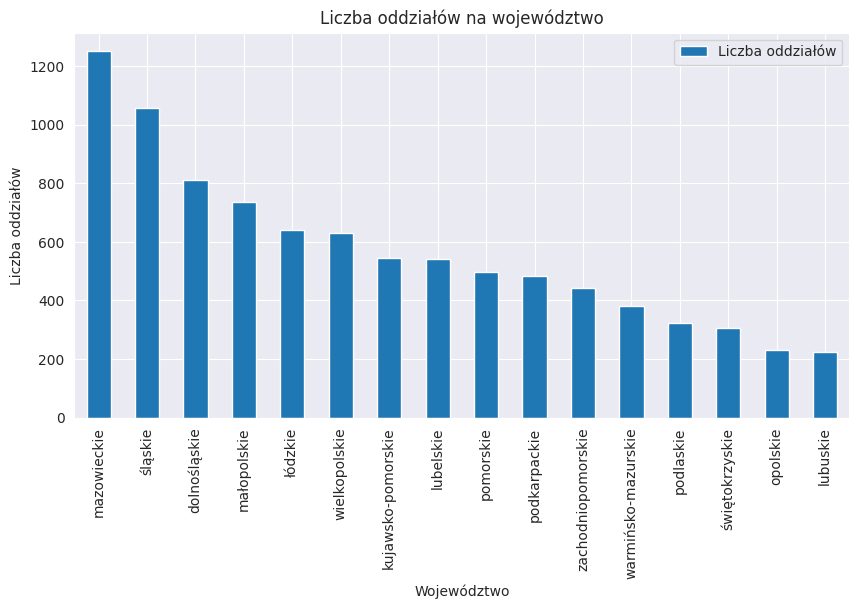

In [10]:
df = beds_df.loc[beds_df['Rok'] == 2023, ['Województwo', 'Liczba oddziałów']].groupby('Województwo').agg({'Liczba oddziałów': 'sum'})
df = df.sort_values('Liczba oddziałów', ascending=False)
df.plot(kind='bar', figsize=(10,5))
plt.title('Liczba oddziałów na województwo')
plt.ylabel('Liczba oddziałów')
plt.xlabel('Województwo')

In [11]:
print(beds_df.loc[beds_df['Rok'] == 2023].groupby('Województwo')['Liczba oddziałów'].sum().sort_values())

Województwo
lubuskie                223
opolskie                232
świętokrzyskie          306
podlaskie               323
warmińsko-mazurskie     380
zachodniopomorskie      443
podkarpackie            485
pomorskie               497
lubelskie               543
kujawsko-pomorskie      545
wielkopolskie           629
łódzkie                 641
małopolskie             736
dolnośląskie            812
śląskie                1058
mazowieckie            1252
Name: Liczba oddziałów, dtype: int64


Text(0.5, 0, 'Województwo')

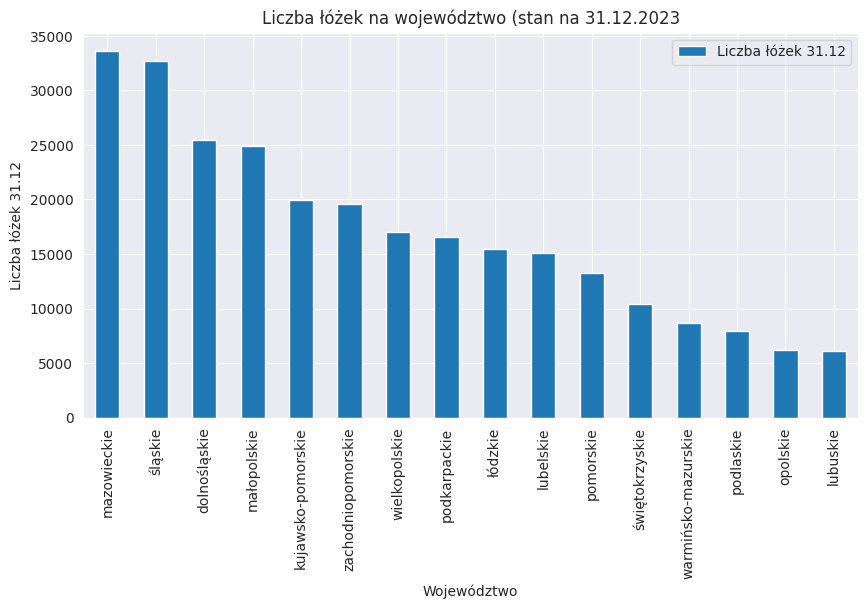

In [12]:
df = beds_df.loc[beds_df['Rok'] == 2023, ['Województwo', 'Liczba łóżek 31.12']].groupby('Województwo').agg({'Liczba łóżek 31.12': 'sum'})
df = df.sort_values('Liczba łóżek 31.12', ascending=False)
df.plot(kind='bar', figsize=(10,5))
plt.title('Liczba łóżek na województwo (stan na 31.12.2023')
plt.ylabel('Liczba łóżek 31.12')
plt.xlabel('Województwo')

mapka

In [17]:
beds_df

,Rok,Województwo,Powiat,Gmina,Poziom sieci PSZ,Rodzaj Świadczeń,Nazwa Specjalności komórki,Kod specjalności komórki,Liczba oddziałów,Liczba łóżek 31.12,Średnioroczna liczba łóżek
0,2017,dolnośląskie,bolesławiecki,Nowogrodziec,Poza siecią,Ośrodki (Zespoły) Opieki Pozaszpitalnej,Hospicjum stacjonarne/stacjonarny ośrodek opie...,2184,1,15,15.0
1,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób wewnętrznych,4000,1,31,31.0
2,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział neurologiczny,4220,1,12,12.0
3,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział anestezjologii i intensywnej terapii,4260,1,7,7.0
4,2017,dolnośląskie,bolesławiecki,Bolesławiec,Szpital I stopnia,Oddziały Szpitalne i Inne Komórki Opieki Szpit...,Oddział chorób zakaźnych,4340,1,11,11.0
...,...,...,...,...,...,...,...,...,...,...,...
51148,2023,opolskie,m. Opole,Opole,Poza siecią,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,9000,1,26,26.0
51149,2023,śląskie,m. Katowice,Katowice,Szpital onkologiczny,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,9000,1,5,5.0
51150,2023,wielkopolskie,m. Poznań,Poznań,Szpital onkologiczny,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,9000,1,5,5.0
51151,2023,wielkopolskie,m. Poznań,Poznań,Szpital ogólnopolski,Inne Komórki Organizacyjne Działalnosci Medycznej,Inna i nieokreślona komórka działalności medyc...,9000,1,0,0.0
